In [18]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile

In [3]:
all_data_df = pd.read_csv('out.csv')

In [4]:
all_data_df.columns

Index(['Unnamed: 0', 'Date', 'hhmm', 'DHI', 'DNI', 'GHI', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo', 'Wind Speed',
       'Precipitable Water', 'Wind Direction', 'Relative Humidity',
       'Temperature', 'Pressure', 'Solar', 'Installed', 'Normalized_Solar'],
      dtype='object')

In [5]:
all_data_df.describe()

,Unnamed: 0,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,...,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Installed,Normalized_Solar
count,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,...,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90514.000000,90520.000000,90514.000000
mean,45259.500000,82.290046,211.000574,215.278944,61.669068,342.516527,280.774437,2.733263,16.258114,86.930466,...,0.149484,1.879301,3.167055,163.865018,80.808524,20.668934,1010.633285,36.866446,556.532258,0.050948
std,26131.017521,114.260887,314.543640,293.151831,71.465823,367.318256,341.030383,3.020745,7.618008,41.376251,...,0.020515,1.031897,1.445543,92.233456,19.192743,8.151573,5.975875,71.288253,545.122256,0.063702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.600000,6.490000,...,0.131000,0.000000,0.252000,0.000000,18.500000,-4.600000,990.000000,0.000000,121.000000,0.000000
25%,22629.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,52.760000,...,0.140000,1.100000,1.933000,110.500000,67.370000,15.000000,1010.000000,0.000000,193.000000,0.000000
50%,45259.500000,17.000000,0.000000,19.000000,26.000000,126.000000,36.000000,1.000000,18.400000,85.915000,...,0.148000,1.700000,3.300000,159.400000,86.390000,22.000000,1010.000000,1.964354,288.000000,0.007485
75%,67889.250000,130.000000,391.000000,400.000000,117.000000,737.000000,594.000000,6.000000,23.000000,122.252500,...,0.160000,2.500000,4.301000,201.100000,98.930000,26.000000,1010.000000,33.047888,566.000000,0.105578
max,90519.000000,507.000000,1023.000000,1066.000000,498.000000,1023.000000,1066.000000,10.000000,27.100000,173.340000,...,0.870000,7.000000,7.169000,360.000000,100.000000,41.000000,1039.000000,356.877620,1858.000000,0.251041


In [6]:
year_2018_df=all_data_df[all_data_df['Date'].str.endswith('2018')]

In [7]:
for label in ['Unnamed: 0', 'Date', 'hhmm', 'Normalized_Solar','Installed','Fill Flag']:
    if label in year_2018_df.columns:
        year_2018_df.drop(label,axis=1,inplace=True)

/home/giang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
year_2018_df.columns

Index(['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar'],
      dtype='object')

In [9]:
year_2018_df=year_2018_df[year_2018_df['Solar']>0]

In [10]:
year_2018_df.head()

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar
80300,183,287,312,77,845,458,7,-9.5,63.18,0.14,4.6,1.1,24.0,44.96,1.1,1037.0,54.831180
80301,201,360,384,82,872,524,7,-9.6,59.51,0.14,4.4,1.2,23.0,43.96,1.4,1036.0,66.763453
80302,235,211,351,86,891,577,7,-9.5,56.53,0.14,4.3,1.2,22.0,42.87,1.8,1036.0,83.739462
80303,256,239,395,88,906,616,4,-9.5,54.34,0.14,4.1,1.2,20.0,42.22,2.0,1035.0,103.582960
80304,246,323,440,89,914,639,7,-9.3,53.04,0.14,3.9,1.2,18.0,41.93,2.3,1035.0,118.799628


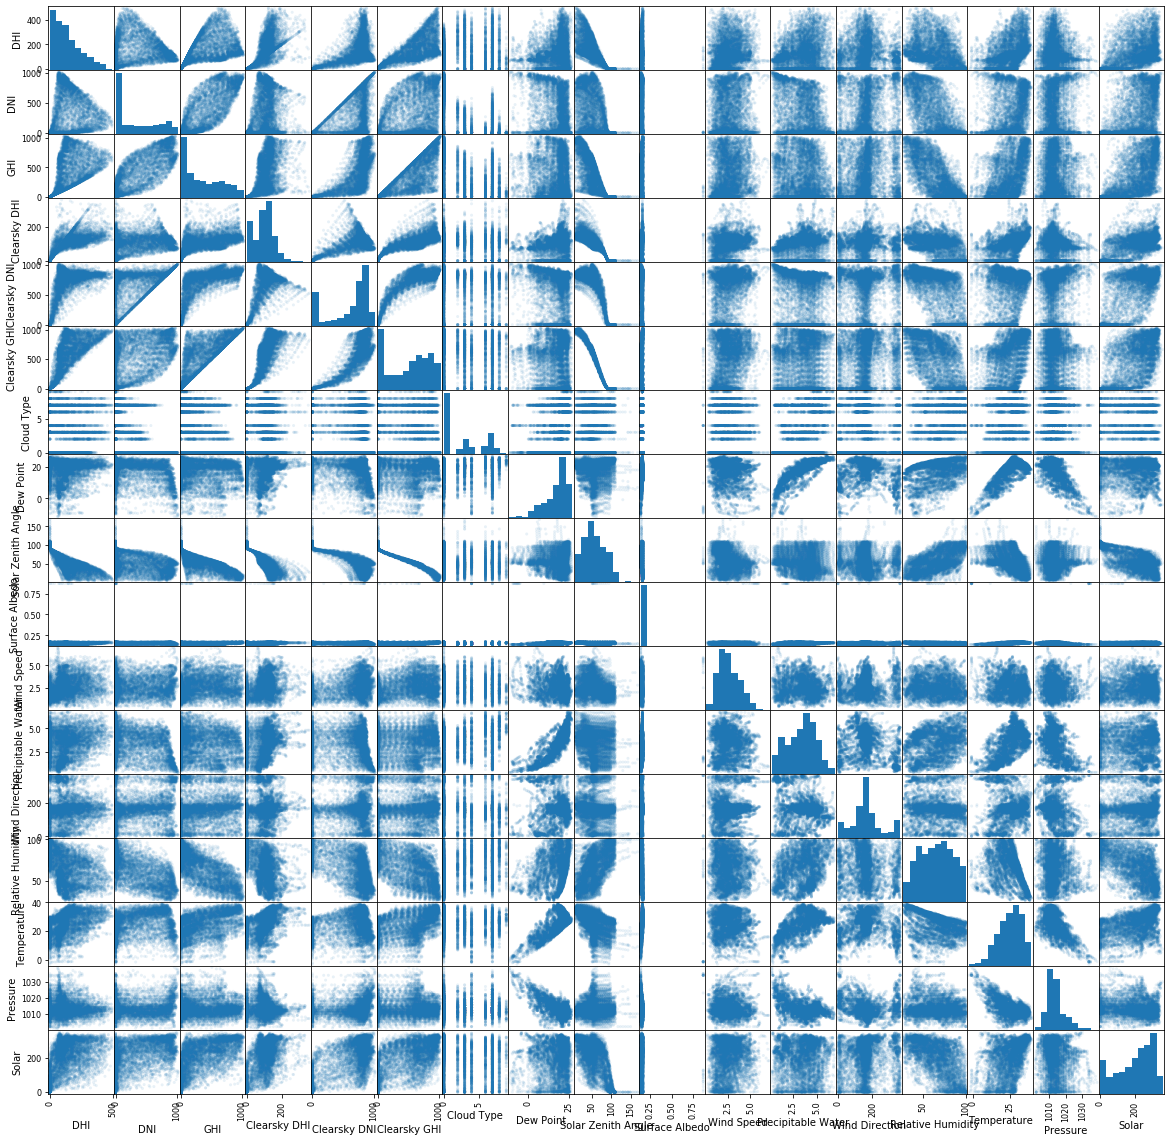

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(year_2018_df, figsize=(20, 20), alpha=0.1)
plt.show()

In [20]:
corr = year_2018_df.corr(method='pearson')

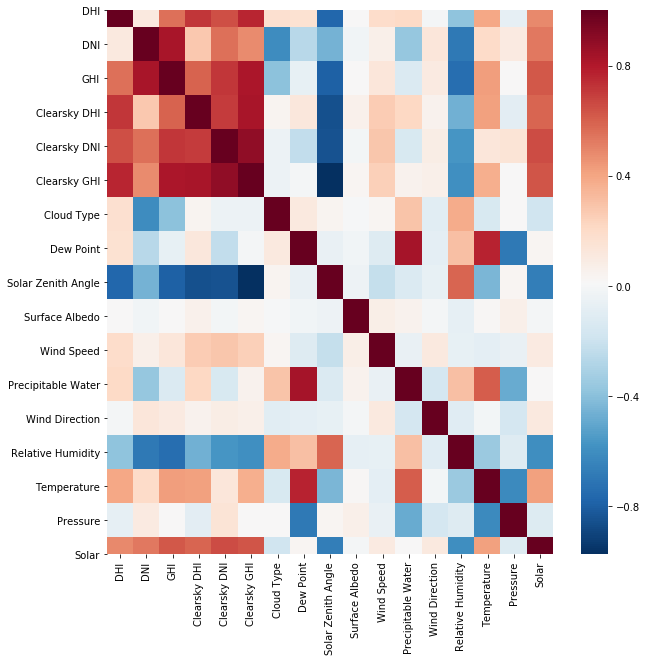

In [23]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(corr, cmap = "RdBu_r", ax=ax)
